# Day 3 - EDA Exercises

__Description:__
* <a href = '#sec1'>Preliminary</a>
* <a href = '#sec4'>Exercise 1: Investigate relationships and distributions</a> 
    * <a href = '#sec41'>1.1 Distribution of a single input variable </a> 
    * <a href = '#sec42'>1.2 Relationship between a numeric input and a categorical target</a> 
    * <a href = '#sec43'>1.3 Relationship between a categorical input and a categorical target</a> 
* <a href = '#sec5'>Exercise 2: Understand relationship between input variables</a>

----
<a id='sec1'></a>
# Preliminary

### Import required packages and change directory 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set working directory
#os.chdir(default_path)

### Load data

In [2]:
# Load the data
churn_df = pd.read_pickle("churn_for_engineering.p")

-------
<a id='sec4'></a>

# Exercise 1: Investigate relationships and distributions 
### Exercises:

1. Distribution of a single variable
   * Create a distribution plot of the numeric input variable **cash_withdrawals_value**. 
   * Create a countplot of the categorical input variable **segment**.
2. Numeric input / Categorical target: From the list of possible chart types, select the one to best investigate the relationship between the numeric variable **cash_withdrawals_value** and our target **churn_flag**.
   * Barplot
   * Boxplot
   * Violinplot
   * Stripplot
   * Kernel Density Plot
   * Catplot
3. Categorical input / Categorical target: From the list of possible chart types, select the chart type to best investigate the relationship between the categorical variable **segment** and our target **churn_flag**.
   * Countplot
   * Contigency table
   * Stacked Barplot

<a id='sec41'></a>
### 1.1 Distribution of a single input variable
* Distribution plot
* Countplot

### Distributionplot
__sns.distplot():__ The distplot shows the distribution of a univariate set of observations. It's suitable for visualising numeric variables.

In [ ]:
#TASK: Create the distribution plot of the "cash_withdrawals_value" variable and selects a bin size of 50
sns.distplot(churn_df.??????, bins = ??)

# Add title
plt.title("Distribution of cash withdrawals value")

# Add labels
plt.ylabel("Density")

### Countplot

__sns.countplot():__ Counts the number of occurrences for each unique value of a variable. It's suitable to visualize categorical data. The __palette__ parameter lets you chose a different color.

In [ ]:
#TASK: Create the count plot with categorical input variable "segment" and use the "autumn" color palette
sns.countplot(x = ?????, data = churn_df, palette = ?????)

<a id='sec42'></a>
### 1.2 Relationship between a numeric input and a categorical target
* Barplot
* Boxplot
* Violinplot
* Stripplot
* Kernel density plot
* Catplot

### Barplot

__sns.barplot():__ General plot that allows you to aggregate the categorical data based off some function, by default the mean.

In [ ]:
sns.barplot(x="churn_flag", y= 'cash_withdrawals_value', data=churn_df, palette='Set1')

### Boxplot

__sns.boxplot():__ A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. Outliers can easily be identified using the inter-quartile range.

In [ ]:
sns.boxplot(x="churn_flag", y= 'cash_withdrawals_value', data=churn_df, palette='Set2')

### Violinplot

__sns.violinplot():__ A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [ ]:
sns.violinplot(x="churn_flag", y= 'cash_withdrawals_value', data=churn_df, palette='rainbow')

### Stripplot
__sns.stripplot:__ The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

In [ ]:
sns.stripplot(x="churn_flag", y= 'cash_withdrawals_value', data=churn_df, palette='coolwarm',jitter=True)

### Kernel density plot
__sns.kdeplot:__ Fits and plots a univariate or bivariate kernel density estimate.

In [ ]:
sns.kdeplot(churn_df[churn_df['churn_flag']==1]['cash_withdrawals_value'])
sns.kdeplot(churn_df[churn_df['churn_flag']==0]['cash_withdrawals_value'])
plt.title("cash_withdrawals_value")
plt.legend(['churn_flag:1','churn_flag:0'], loc='upper right')
plt.show()

### Catplot
__sns.catplot:__ catplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type (e.g. box, violin, bar, count, strip, swarm). 

In [ ]:
sns.catplot(x = "churn_flag", y = 'cash_withdrawals_value', data = churn_df,
            kind = "box", height = 2.5, aspect = 4)

In [ ]:
#TASK: From the above 6 plots, select one which you believe best represents the relationship between churn and withdrawal value.  Give your reasons.





<a id='sec43'></a>
### 1.3 Relationship between a categorical input and a categorical target

* Contigency tables
* Barplot
* Countplot
* Stacked Bar Chart

### Contigency tables

In [ ]:
# Margin parameter additionally shows all totals
two_way = pd.crosstab(index=churn_df["segment"], columns=churn_df["churn_flag"], margins=True)
two_way

### Barplot
We can compare the churn rate in each segment by using a barplot. For this we need to convert the categorical target variable to a numeric data type. However, we always need to complement this visualisation with the frequency count in each category. 

In [ ]:
sns.barplot(x="segment", y = pd.to_numeric(churn_df['churn_flag']), data= churn_df, palette='Set1')

In [ ]:
# Churn rate by segment
churn_df.groupby(['segment','churn_flag'])['churn_flag'].count()

In [ ]:
# Frequency count in each segment
churn_df['segment'].value_counts()

### Countplot

In [ ]:
sns.countplot(x = 'segment', hue = 'churn_flag', data = churn_df, palette = 'ocean')

### Stacked Barplot

In [ ]:
two_way.plot(kind="bar", stacked=True)

In [ ]:
#TASK: From the above 4 plots, select one which you believe best represents the relationship between churn and segment.  Give your reasons.





-------
<a id='sec5'></a>
## Exercise 2: Understand the relationship between input variables
- Scatterplot
- Jointplot
- Pairplot
- Facet Grid
- Correlation heatmap
- Clustermap

### Scatterplot

__sns.scatterplot:__ Draws a scatter plot with possibility of several semantic groupings. 

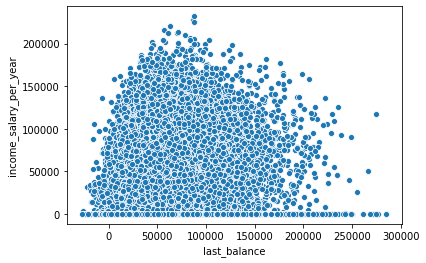

In [4]:
#TASK: Generate a scatter plot for "last_balance" and "income_salary_per_year"
sns.scatterplot(x='last_balance', y='income_salary_per_year', data= churn_df)

### Jointplot

__jointplot():__ allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

In [ ]:
#TASK: Generate a jointplot plot for "last_balance" and "income_salary_per_year"
sns.jointplot(x=?????, y=????, data= churn_df, kind='reg')

### Pairplot

__sns.pairplot:__ Plots pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

In [ ]:
#TASK: Generate a pair plot for 'last_balance', 'income_deposits_per_year', 'cash_withdrawals_value', 'churn_flag'
columns_to_plot = ['last_balance', 'income_deposits_per_year', 'cash_withdrawals_value', 'churn_flag']

In [ ]:
sns.pairplot(churn_df[?????], hue='churn_flag',palette='coolwarm')

### Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [ ]:
churn_df.head()

In [ ]:
# TASK: Create a facet grid for variables gender and churn_flag for investigating the distribution of cash_withdrawals_value
sns.set(style="darkgrid")
g = sns.FacetGrid(churn_df, row=????, col=????, margin_titles=True)
g.map(plt.hist, 'cash_withdrawals_value', color="steelblue")

### Correlation heatmap

#### Correlation heatmap of selected numeric input variables
    corr()
    sns.heatmap()

In [ ]:
data_subset = ['size_household', 'last_balance', 'income_salary_per_year',
               'income_deposits_per_year', 'online_number_of_logins_per_month',
               'online_tranactions_per_month', 'advisor_contacts_last12months',
               'customer_limit', 'cash_withdrawals_value', 'consumer_credit_value',
               'consumer_credit_maturity', 'account_fee', 'number_of_refusals']

In [ ]:
#TASK: Create a correlation heatmap for the 12 variables in 'data_subset'
corr = churn_df[?????].corr();
sns.heatmap(corr);

###  Bonus Exercise: Improve formatting of correlation plot

In [ ]:
#TASK:  Improve the visual appeal of the chart by showing just the lower left section of the correlation heatmap above
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask);

#### Add labels and change color scheme
    annot
    cmap
    plt.subplots(figsize=(x,y)): increase figure size to x-by-y inches

In [ ]:
#TASK: Add labels to the correlation heatmap and change the color scheme by setting camp="RdBu_r"

plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f',
            vmin=-1, vmax=1, center=0,
            cmap="RdBu_r", square=True, linewidths=.5, cbar_kws={"shrink": .5})

# The current versions of matplotlib and seaborn have a bug, cutting off parts of the first and last rows.
# We can fix this manually using the lines below
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Clustermap
Seaborn also provides a

    clustermap()

which sorts the variables by their correlation structure. This makes it easier to identify overarching relationships in the data.

In [ ]:
#TASK: Sort values by their correlation structure
sns.clustermap(corr)

We can add the same formatting options like in the heatmap.

In [ ]:
sns.clustermap(corr, annot=True, fmt='.2f', figsize=(10,10),
            vmin=-1, vmax=1, center=0,
            cmap="RdBu_r", square=True, linewidths=.5)

# Good job!